# T Testi

Student T testinin bu versiyonu iki ortalama arasındaki farkın testi olarak bilinmektedir. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_excel("LungCap.xls")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LungCap  725 non-null    float64
 1   Age      725 non-null    int64  
 2   Height   725 non-null    float64
 3   Smoke    725 non-null    int64  
 4   Gender   725 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 28.4 KB


In [6]:
df.head(3)

,LungCap,Age,Height,Smoke,Gender
0,6.475,6,62.1,0,0
1,10.125,18,74.7,1,1
2,9.550,16,69.7,0,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LungCap,725.0,7.863148,2.662008,0.507,6.15,8.0,9.8,14.675
Age,725.0,12.326897,4.004750,3.000,9.00,13.0,15.0,19.000
Height,725.0,64.836276,7.202144,45.300,59.90,65.4,70.3,81.800
Smoke,725.0,0.106207,0.308315,0.000,0.00,0.0,0.0,1.000
Gender,725.0,0.493793,0.500307,0.000,0.00,0.0,1.0,1.000


## Varsayım 1: Veriler, normal dağılıma uygun olmalıdır.

In [28]:
#Bağımlı değişkenin normal dağılım testi
from scipy.stats import shapiro
stat, p = shapiro(df['LungCap'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Bağımlı değişken normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Bağımlı değişken normal dağılıma uygun değil (H0 RED)')

Statistics=0.993, p=0.002
Bağımlı değişken normal dağılıma uygun değil (H0 RED)


## Varsayım 2: Varyanslar homojen olmalıdır.

In [33]:
stats.levene(df['LungCap'][df['Gender'] == 1],
             df['LungCap'][df['Gender'] ==0])

LeveneResult(statistic=0.6756634522420357, pvalue=0.4113549959467262)

 p=0.41 olması sebebiyle H0 reddedilemez. %95 güvenilirlikle varyanslar homojendir

## Testin Uygulanması

H0: Kadın ve erkeklerin akciğer kapasiteleri arasında anlamlı bir fark yoktur.

In [40]:
t_test = t_value,p_value=stats.ttest_ind(df["LungCap"],df["Gender"])
print(t_test)

Ttest_indResult(statistic=73.2573473392879, pvalue=0.0)


* H0 reddedilir(p < 0.05). 
* Kadın ve erkeklerin akciğer kapasiteleri arasında anlamlı bir fark vardır.


## Basit Regresyon

* Tek bir bağımlı ve tek bir bağımsız değişkenden oluşur. 
* Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu oluşturmaktadır. 
* Bu doğrusal fonksiyonu ise; Hata kareler toplamını minimize edecek katsayı tahminlerini bulmaya çalışarak oluşturur.

## Model

### AkciğerKapasitesi=B0+B1*Cinsiyet

In [41]:
X = df.drop(["LungCap", "Height", "Age", "Smoke"], axis=1)
y = df["LungCap"]

In [42]:
X = sm.add_constant(X)
lm = sm.OLS(y,X)
model = lm.fit()

In [43]:
model.params

const     8.309332
Gender   -0.903587
dtype: float64

In [44]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                LungCap   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.47
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           4.26e-06
Time:                        14:57:49   Log-Likelihood:                -1727.5
No. Observations:                 725   AIC:                             3459.
Df Residuals:                     723   BIC:                             3468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3093      0.137     60.638      0.0

* Modelimizin p değeri(4.26e-06) 0.05’ten küçük olduğu için kurulan regresyon modeli anlamlıdır.
* Cinsiyet, akciğer kapasitesinin tahmin edilmesini %2,7 oranında açıklayabilmektedir. Buradan cinsiyetin akciğer kapasitesini belirlemede tek başına yeterli olmadığı yorumunu yapabiliriz. 
* Regresyon denklemindeki katsayılarımızın ise p değerleri 0.05’ten küçük olduğu için, katsayılarımız da anlamlıdır. 
* Böylelikle denklemi şu şekilde oluşturabiliriz; 
* AkciğerKapasitesi=8.53-0.90*Cinsiyet

## Varsayım 1: Hata terimlerinin aldığı değerler normal dağılım özelliği göstermelidir.

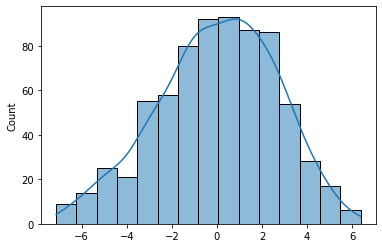

In [45]:
sns.histplot(x=model.resid, bins=15, kde=True)
plt.show()

In [47]:
# normal dağılım testi
from scipy.stats import shapiro
stat, p = shapiro(model.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Hatalar normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Hatalar normal dağılıma uygun değil (H0 RED)')

Statistics=0.991, p=0.000
Hatalar normal dağılıma uygun değil (H0 RED)


## Varsayım 2: Hata terimlerinin varyansı sabittir. 


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.908843
p-value                        0.340422
f-value                        0.907473
f p-value                      0.341104

 Goldfeld-Quandt test ----
                value
F statistic  1.114967
p-value      0.150985

 Residuals plots ----


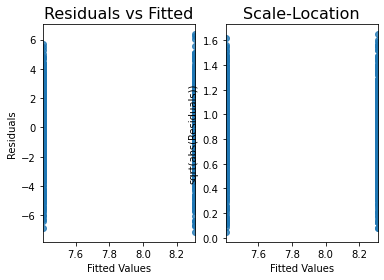

In [48]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model)

Yapılan testlere göre H0 reddedilemeyeceğinden değişen varyans sorunumuz yoktur.